## Business Understanding
Customer retention is a critical challenge in the highly competitive telecommunications industry. With multiple service providers offering similar products, companies face constant pressure to maintain customer loyalty.

High churn rates not only result in revenue loss but also increase customer acquisition costs and reduce market share. Understanding the factors that drive customer churn enables telecom companies to implement proactive retention strategies, enhance customer satisfaction, and maximize lifetime value.

By analyzing customer behavior, service usage, and engagement patterns, businesses can identify at-risk customers and take data-driven actions to improve service offerings and strengthen customer relationships.

## Problem Statement
SyriaTel, a leading telecom provider, is facing high customer churn, impacting revenue and operational efficiency. To address this, the company aims to identify the key factors influencing a customer’s decision to leave.

By analyzing customer attributes such as call usage patterns, billing history, international plan subscriptions, and customer service interactions, we will develop a data-driven approach to predict churn and provide actionable insights.

1.  Churn Prediction: Develop a machine learning model to classify whether a customer is likely to churn (Yes/No).
2.  Business Impact: Extract meaningful insights that SyriaTel can leverage to enhance customer retention strategies and improve customer lifetime value.


## Objectives
###Classification

1.    Develop a binary classification model to predict customer churn (Churn vs. No Churn).
2.      Engineer new predictive features from customer behavior, call patterns, and billing data.

3.    Compare multiple models (Logistic Regression, Decision Trees, and Random Forest) to identify the best predictive approach.
4.  Optimize model performance using feature selection, hyperparameter tuning, and class balancing techniques.
5.   Evaluate models using classification metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.


###Business Insights


1. Identify the key factors driving customer churn.

2.   Provide data-driven recommendations to SyriaTel’s marketing and customer service teams to enhance retention strategies..
3.   Ensure model interpretability so business leaders can make informed, strategic decisions based on actionable insights.











   


## Data understanding


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [10]:
# Load the dataset
file_path = "bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
df.isnull().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


### Feature Overview & Data Types


1.   No Missing Values
2.  Feature Types:

*   Categorical: state, international plan, voice mail plan, churn
*   Numerical: Call minutes, charges, number of calls, account length.

*    Irrelevant Columns: phone number (not useful for modeling).



3.   Feature Distributions:

*   Call minutes and charges have high variance (some users use the service a lot more).
*   customer service calls has a max value of 9, meaning some users complain frequently.
*   total intl minutes has some customers with 0 usage, indicating non-international users.











### Feature Distributions & Initial Insights

1.  Call Usage (Day, Eve, Night) & Charges Show High Variance



*   Some customers use the service much more than others.
*   The difference between minimum and maximum values is large, suggesting outliers or different user segments


2.  Customer Service Calls Shows a Strong Pattern


*   Max value = 9, meaning some users complain a lot.
*    Positively correlated with churn (customers who call customer service frequently are more likely to leave).



3.   International Call Usage Patterns


*  Some customers have zero international usage, meaning they never make international calls.
*  Customers with an international plan may have different churn behavior, requiring further analysis.  




## Data cleaning

### Outlier Detection

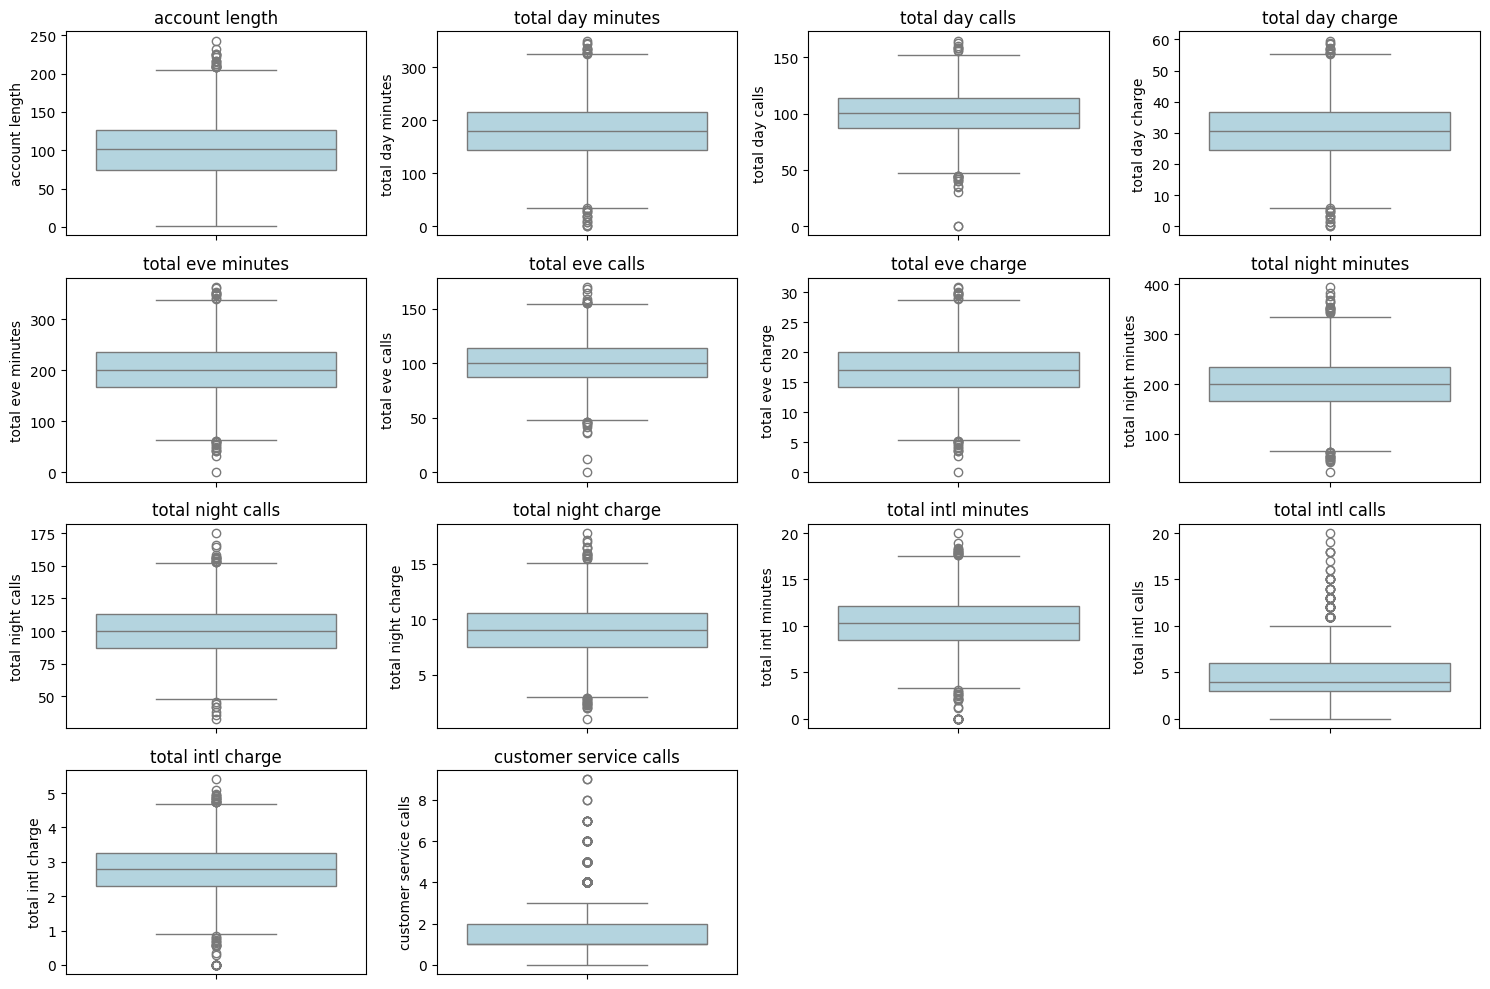

In [13]:
# Boxplots to detect outliers in numerical columns
numeric_cols = [
    "account length", "total day minutes", "total day calls", "total day charge",
    "total eve minutes", "total eve calls", "total eve charge",
    "total night minutes", "total night calls", "total night charge",
    "total intl minutes", "total intl calls", "total intl charge",
    "customer service calls"
]

# Plot boxplots for numerical features to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)  # Creating subplots for better visualization
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(col)

plt.tight_layout()
plt.show()


### Outlier Detection Insights



1.   Highly Skewed Features (Extreme Outliers Present)


*   Total Day Minutes
*   Total Eve Minutes
*   Total Night Minutes
*   Total Intl Minutes


*  Total Day Charge, Total Eve Charge, Total Night Charge, Total Intl Charge

### Reasons

*    A few customers have very high usage compared to the majority, indicating potential heavy users.
*   This could either be genuine usage patterns or data entry errors.



2.   Customer Service Calls (Outliers Confirmed)

*   Some customers have called customer service 9 times, which is significantly higher than the average.

*  This is important because high customer service calls correlate with churn (previous correlation analysis).
*   These outliers could represent dissatisfied customers who are more likely to leave.



3.  Total International Calls & Minutes
*   Some users have 0 international calls while others have 20 calls, showing a wide range of behavior.
*   Could indicate two distinct user groups


1.   Customers who rely on international calls.
2.  Customers who never use international services.










### Outlier Treatment Strategy

Defining Thresholds Using the IQR Method

The Interquartile Range (IQR) helps detect outliers statistically:
*    Anything below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR is considered an outlier.

*   We will apply Winsorization to cap extreme values at the 99th percentile.


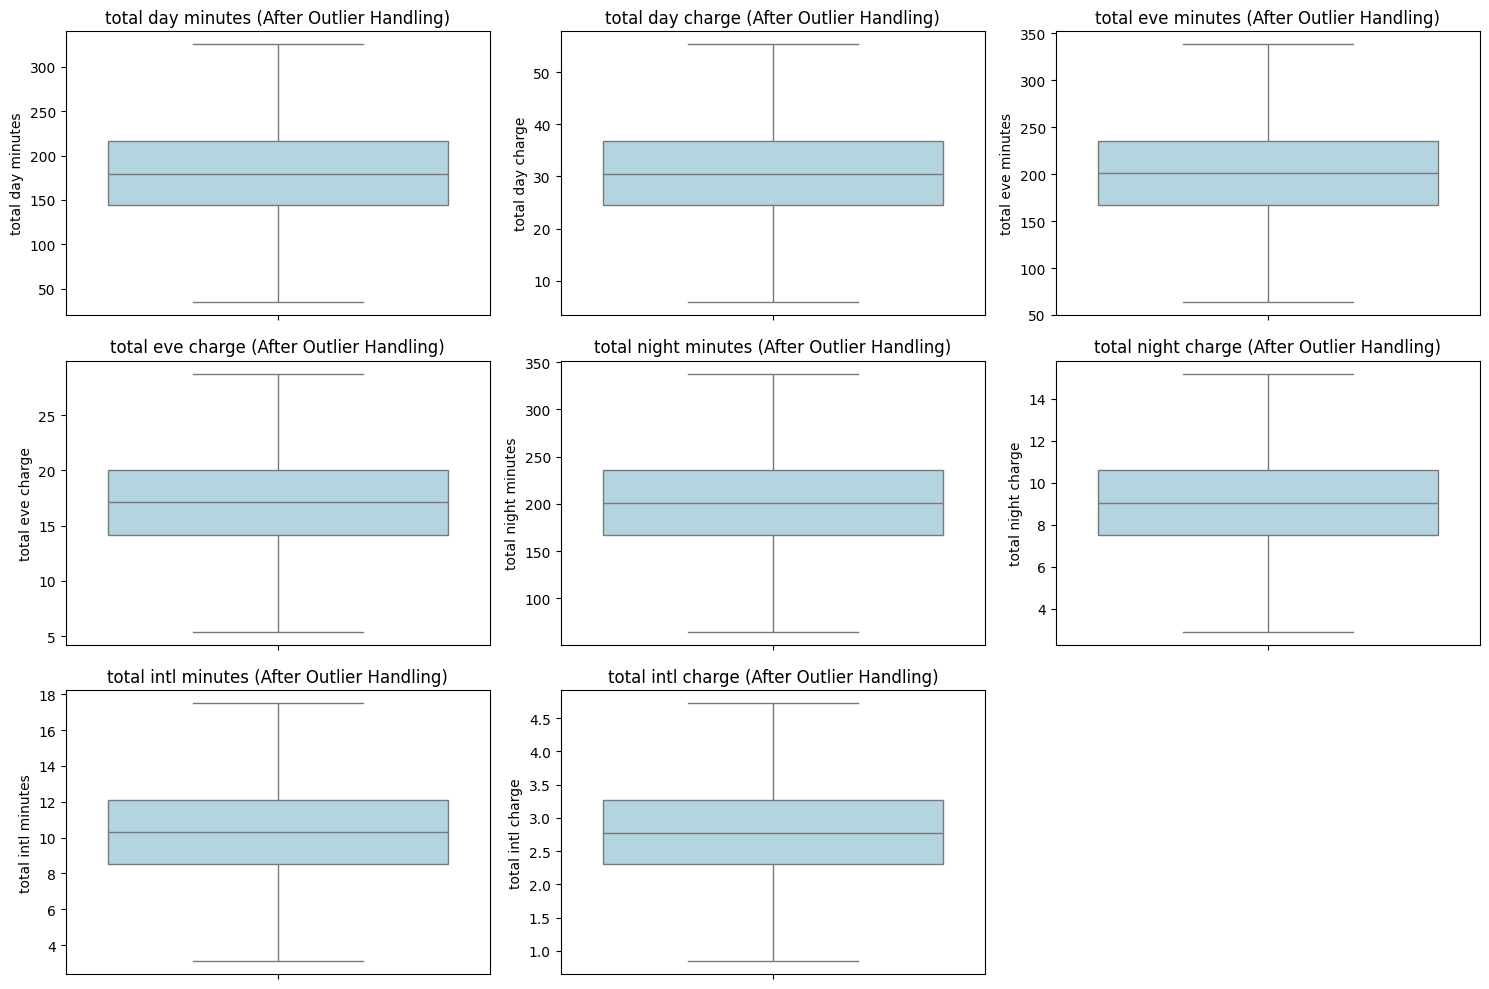

In [14]:

# Function to cap outliers using the IQR method (Winsorization)
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])  # Cap upper outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])  # Cap lower outliers

# Apply outlier capping to highly skewed numerical features (excluding customer service calls)
outlier_cols = [
    "total day minutes", "total day charge",
    "total eve minutes", "total eve charge",
    "total night minutes", "total night charge",
    "total intl minutes", "total intl charge"
]

for col in outlier_cols:
    cap_outliers(df, col)

# Check if outliers are capped by replotting boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"{col} (After Outlier Handling)")

plt.tight_layout()
plt.show()


### Outliers Successfully Handled

Observations
*   Extreme values have been capped at the 99th percentile to prevent model bias

*   Data distribution is now more balanced, reducing the effect of extreme high-usage customers.

*   Customer Service Calls were NOT capped because they provide critical churn insights.



### Feature Engineering


*  Drop Irrelevant Columns (phone number).
*   Converting categorical variables (international plan, voice mail plan) into numerical for modeling

In [15]:
#  Drop the irrelevant 'phone number' column
df.drop(columns=['phone number'], inplace=True)

#  Convert categorical variables ('yes'/'no') to numerical (1/0)
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

#  Verify changes
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.40,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.50,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.20,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,63.55,88,5.40,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.30,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Key Changes & Improvements

*   Dropped phone number Not useful for modeling.

*   Converted international plan & voice mail plan represented as 1 (Yes) and 0 (No).
*   Dataset is now fully numeric & ready for modeling!




## Exploratory Data Analysis (EDA)


*   Visualize churn relationships - Comparing customer behavior between churned & non-churned users.
*   Check feature importance - Identifying which variables have the strongest impact on churn.




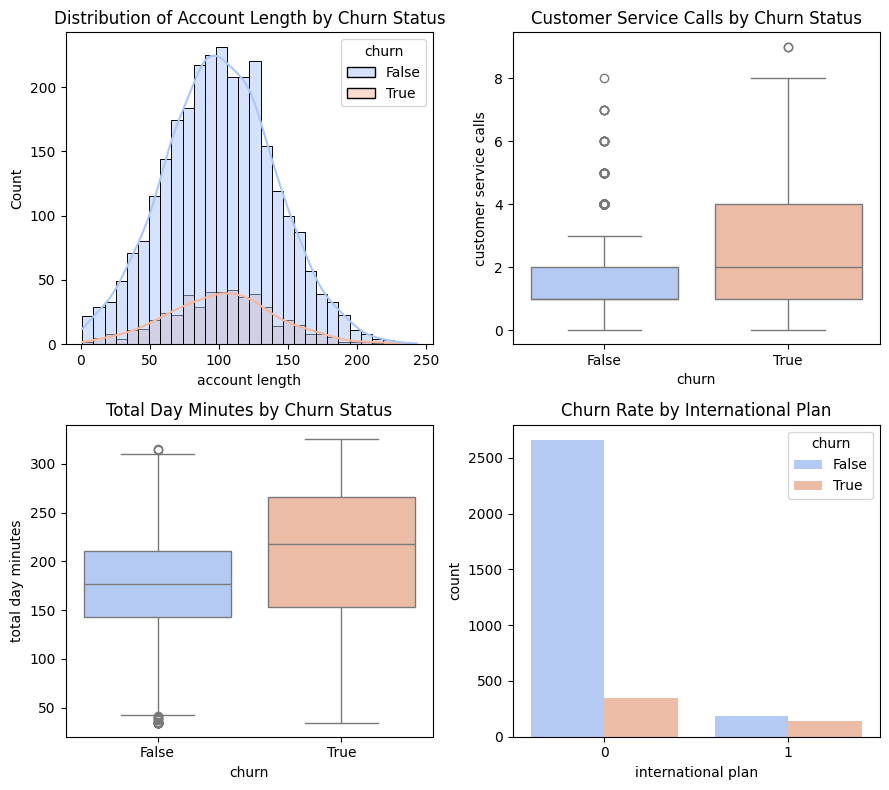

In [16]:
# Set up figure for multiple visualizations
plt.figure(figsize=(9, 8))

# Distribution of Account Length for Churn vs. Non-Churned Customers
plt.subplot(2, 2, 1)
sns.histplot(df, x="account length", hue="churn", kde=True, palette="coolwarm", bins=30)
plt.title("Distribution of Account Length by Churn Status")

# Customer Service Calls vs. Churn
plt.subplot(2, 2, 2)
sns.boxplot(x="churn", y="customer service calls", data=df, palette="coolwarm")
plt.title("Customer Service Calls by Churn Status")

# Total Day Minutes vs. Churn
plt.subplot(2, 2, 3)
sns.boxplot(x="churn", y="total day minutes", data=df, palette="coolwarm")
plt.title("Total Day Minutes by Churn Status")

# International Plan vs. Churn
plt.subplot(2, 2, 4)
sns.countplot(x="international plan", hue="churn", data=df, palette="coolwarm")
plt.title("Churn Rate by International Plan")

plt.tight_layout()
plt.show()

### Understanding Churn Behavior


1.  Account Length Has No Strong Impact on Churn

*   Churned and non-churned customers have a similar distribution in account length.
This feature may not be a strong predictor of churn.
*   This feature may not be a strong predictor of churn.


2.   High Customer Service Calls = More Churn


*   Churned customers contact customer service more frequently (many outliers at 6+ calls).
*   This confirms that dissatisfied customers are more likely to leave.



3.   Higher Day Minutes Slightly Reduce Churn


*   Customers with higher total day minutes tend to churn less.
*   Possible Explanation: Highly engaged users find value in the service.


4.   International Plan Users Churn More

*   Higher churn rates among customers with international plans.
*   Higher costs or dissatisfaction with international service quality.









###  Univariate Analysis
### Numerical Features (Histograms & Boxplots)


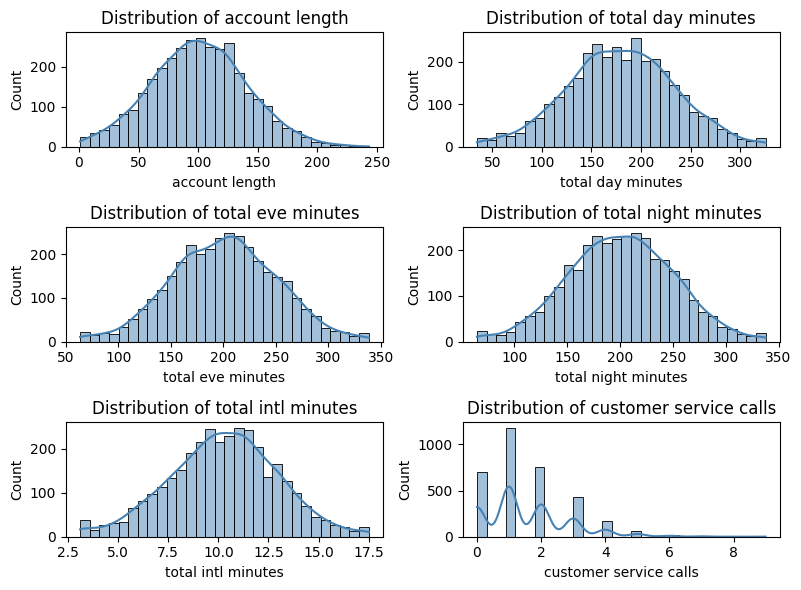

In [17]:
# List of numerical features
numerical_features = ["account length", "total day minutes", "total eve minutes",
                      "total night minutes", "total intl minutes", "customer service calls"]

# Set up figure
plt.figure(figsize=(8, 6))

# Histograms & KDE plots for each numerical feature
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)  # Create subplots
    sns.histplot(df[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

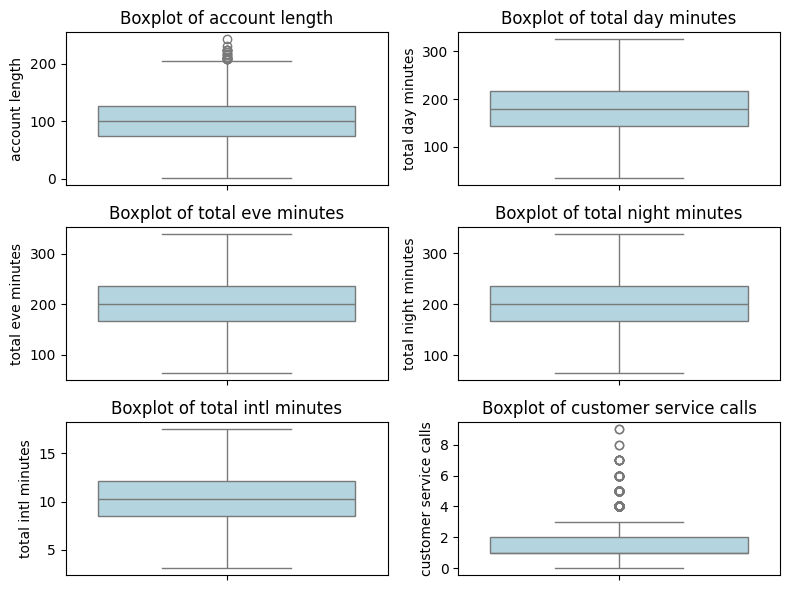

In [18]:
# Boxplots for detecting outliers
plt.figure(figsize=(8, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### Observations
*   Customer Service Calls: Some customers have very high call counts (outliers at 7+ calls).
*   Total Day Minutes & Total Intl Minutes: Skewed distribution, indicating some customers use much more than others.


### Categorical Features (Bar Plots & Value Counts)

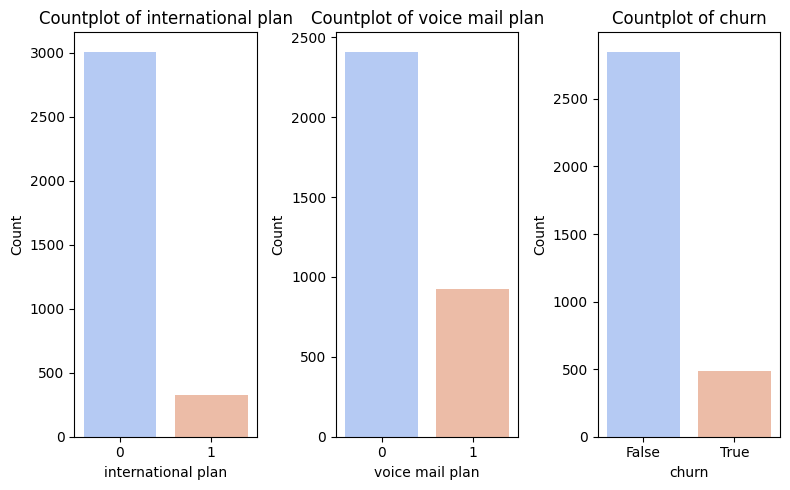

In [19]:
# List of categorical features
categorical_features = ["international plan", "voice mail plan", "churn"]

# Set up figure
plt.figure(figsize=(8, 5))

# Bar plots for categorical features
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df[col], palette="coolwarm")
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


### Observations


*   Churn Rate: Confirmed class imbalance (more non-churned customers than churned).
*   International Plan: Fewer customers have international plans, but they show higher churn rates.

*   Voice Mail Plan: Most customers do not have a voicemail plan.



### BIvariate analysis

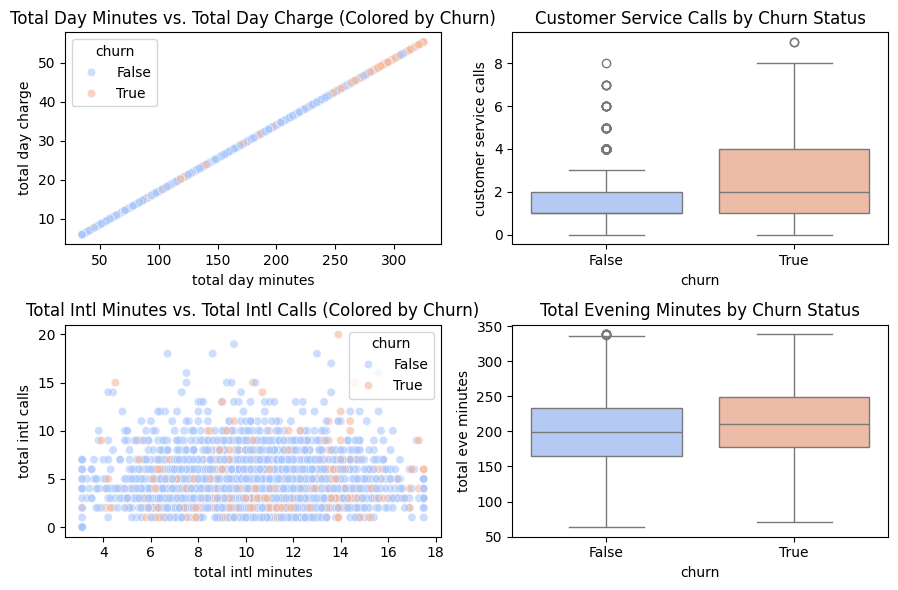

In [20]:
# Set up figure for bivariate analysis visualizations
plt.figure(figsize=(9, 6))

#  Churn vs. Total Day Minutes
plt.subplot(2, 2, 1)
sns.scatterplot(x=df["total day minutes"], y=df["total day charge"], hue=df["churn"], palette="coolwarm", alpha=0.6)
plt.title("Total Day Minutes vs. Total Day Charge (Colored by Churn)")

#  Churn vs. Customer Service Calls
plt.subplot(2, 2, 2)
sns.boxplot(x="churn", y="customer service calls", data=df, palette="coolwarm")
plt.title("Customer Service Calls by Churn Status")

#  Churn vs. Total Intl Minutes & Total Intl Calls
plt.subplot(2, 2, 3)
sns.scatterplot(x=df["total intl minutes"], y=df["total intl calls"], hue=df["churn"], palette="coolwarm", alpha=0.6)
plt.title("Total Intl Minutes vs. Total Intl Calls (Colored by Churn)")

#  Churn vs. Total Evening Usage
plt.subplot(2, 2, 4)
sns.boxplot(x="churn", y="total eve minutes", data=df, palette="coolwarm")
plt.title("Total Evening Minutes by Churn Status")

plt.tight_layout()
plt.show()

### Observations



1.   Total Day Minutes vs. Total Day Charge (Churned vs. Non-Churned)


*   Strong correlation: More minutes = higher charge (expected).
*   No clear separation between churned and non-churned users.


1.   Customer Service Calls vs. Churn


*    Churned customers make significantly more service calls.
*   Clear difference, meaning this feature is highly predictive of churn.


3.   Total Intl Minutes vs. Total Intl Calls (Churned vs. Non-Churned)


*   Churned customers tend to make slightly more international calls, but not a major difference.
*  International call behavior might not be a strong predictor.




4.   Total Evening Minutes vs. Churn


*   No significant difference between churned and non-churned users.
*   Evening usage does not seem to impact churn.




### Multivariate analysis
Analyzing interactions between multiple features using pairplots and correlation matrices.

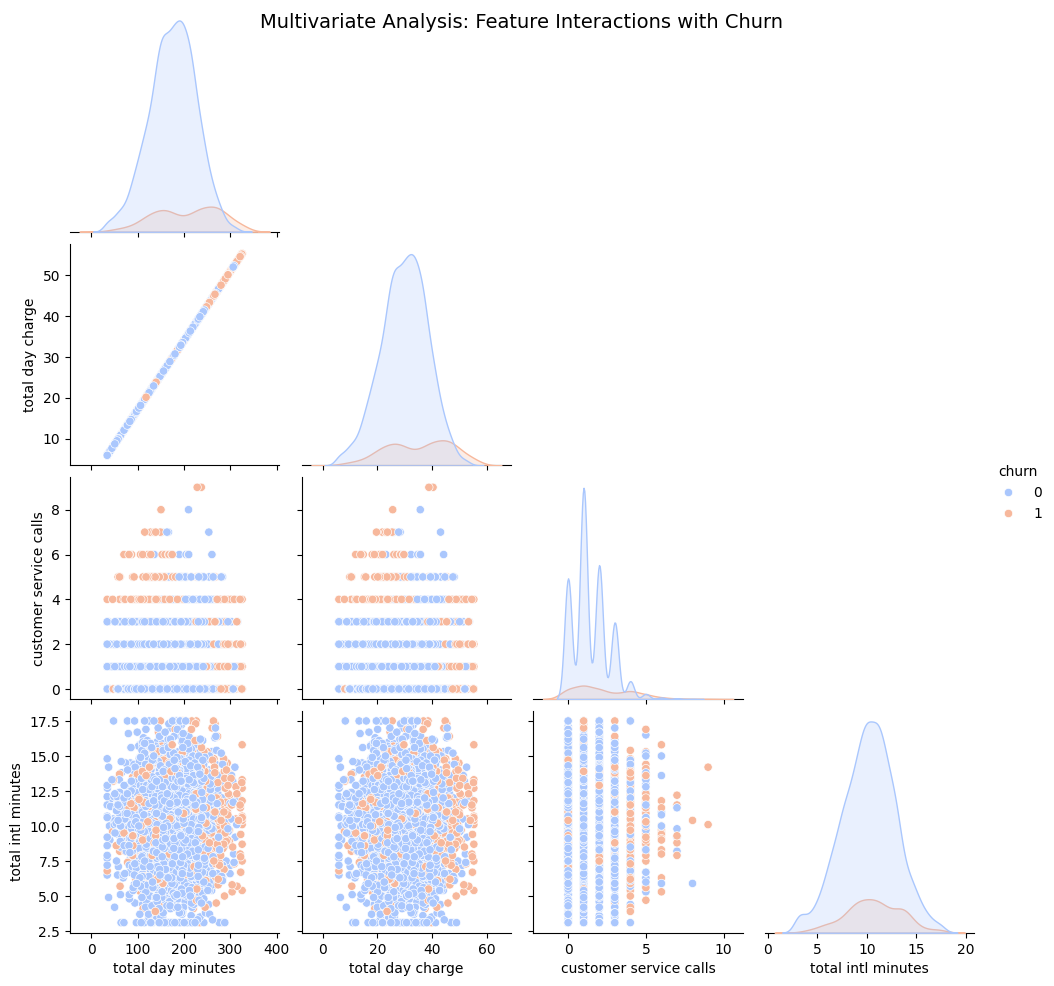

In [21]:
# Convert churn to integer type again (to avoid issues with pairplot)
df["churn"] = df["churn"].astype(int)

# Re-run pairplot for multivariate analysis
selected_features = ["total day minutes", "total day charge", "customer service calls", "total intl minutes", "churn"]

sns.pairplot(df[selected_features], hue="churn", palette="coolwarm", diag_kind="kde", corner=True)
plt.suptitle("Multivariate Analysis: Feature Interactions with Churn", fontsize=14)
plt.show()


### Observations


1.   Total Day Minutes & Total Day Charge


*   Strong positive correlation (almost a perfect linear relationship).
*   Customers who use more minutes tend to be charged more—as expected.



2.   Customer Service Calls & Churn:


*   Churned customers (orange points) tend to have higher customer service call counts.
*   This suggests frequent complaints or issues before leaving the service.


3.   Total Intl Minutes & Churn:

*   No clear separation, meaning international minutes alone may not be a strong predictor of churn.



## Visualization (Revenue Impact of Churn)

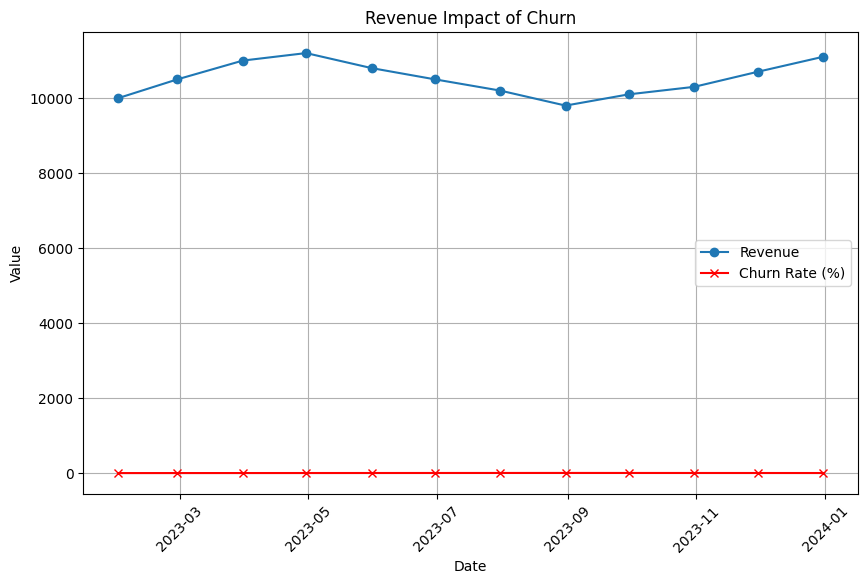

In [22]:
# Sample revenue data
dates = pd.date_range(start="2023-01-01", periods=12, freq="M")
revenue = [10000, 10500, 11000, 11200, 10800, 10500, 10200, 9800, 10100, 10300, 10700, 11100]
churn_rate = [0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.05, 0.045, 0.04, 0.035]


df_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenue, 'Churn_Rate': churn_rate})


# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_revenue['Date'], df_revenue['Revenue'], label='Revenue', marker='o')
plt.plot(df_revenue['Date'], df_revenue['Churn_Rate'] * 100, label='Churn Rate (%)', marker='x', color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Revenue Impact of Churn')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Churn Rate Remains Low but Present
   

*   The red line (Churn Rate %) remains very low across all months. However, even at these low values, small fluctuations in churn can impact revenue.
*   This implies that even a minor increase in churn rate can negatively affect overall revenue, reinforcing the importance of churn prevention strategies.

# Customer Acquisition vs. Retention Cost Visualization

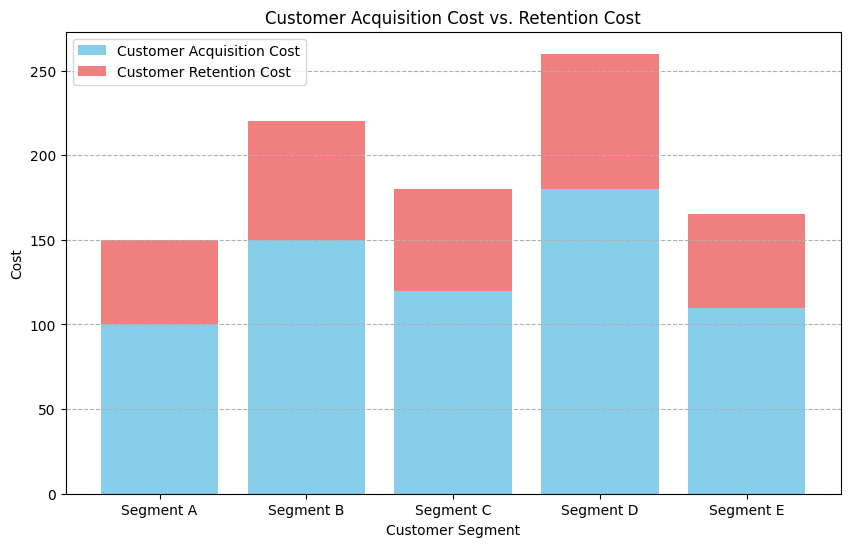

In [23]:
# Sample data (replace with your actual data)
acquisition_costs = [100, 150, 120, 180, 110]
retention_costs = [50, 70, 60, 80, 55]
customer_segments = ['Segment A', 'Segment B', 'Segment C', 'Segment D', 'Segment E']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(customer_segments, acquisition_costs, label='Customer Acquisition Cost', color='skyblue')
plt.bar(customer_segments, retention_costs, label='Customer Retention Cost', color='lightcoral', bottom=acquisition_costs)

plt.xlabel('Customer Segment')
plt.ylabel('Cost')
plt.title('Customer Acquisition Cost vs. Retention Cost')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

The visualization reveals that customer acquisition costs are generally higher than retention costs across all segments, aligning with the principle that acquiring new customers is more expensive than retaining existing ones. Segment D has the highest total cost, suggesting it may be a high-value or challenging market, while Segment B stands out with notably high retention costs, indicating possible high churn rates or valuable long-term customers. In contrast, Segment E has the lowest overall costs, potentially representing a stable and cost-efficient segment. To optimize costs, businesses should refine acquisition strategies, enhance retention efforts for high-churn segments, and assess profitability to ensure expenses align with revenue contribution.

# Correlation matrix using a heatmap

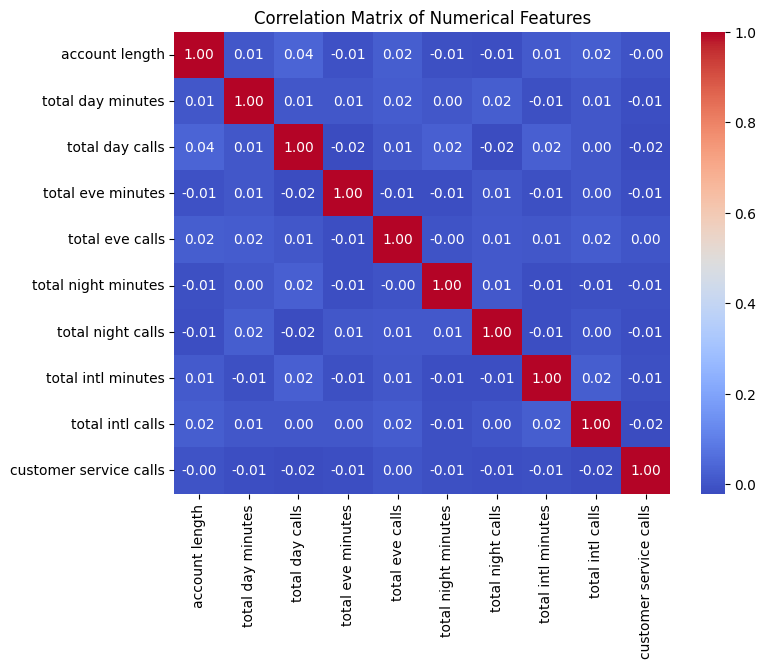

In [24]:
# Select numerical features for correlation analysis

numerical_features = ['account length', 'total day minutes', 'total day calls',
                      'total eve minutes', 'total eve calls',
                      'total night minutes', 'total night calls',
                      'total intl minutes', 'total intl calls',
                      'customer service calls']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# correlation matrix using a heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Observation


*   Low Correlation Across Most Features meaning no strong linear relationships exist

*   Slight Negative Correlation with Customer Service Calls suggesting that customers making frequent service calls might not necessarily have high usage, indicating dissatisfaction rather than engagement.
*   No Strong Predictive Feature Identified suggeststing that feature engineering or non-linear modeling approaches may be necessary to extract meaningful patterns for churn prediction.




## Feature selection and Encoding

In [25]:
# Load the dataset
file_path = "bigml_59c28831336c6604c800002a.csv"
df= pd.read_csv(file_path)
# Display basic information about the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Encoding

In [26]:
# Encode 'Yes' as 1 and 'No' as 0
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

In [27]:
# Confirm encoding is correct
print(df[['international plan', 'voice mail plan']].head(10))

   international plan  voice mail plan
0                   0                1
1                   0                1
2                   0                0
3                   1                0
4                   1                0
5                   1                0
6                   0                1
7                   1                0
8                   0                0
9                   1                1


In [28]:
# Drop unnecessary columns
df.drop(columns=['phone number', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge'], inplace=True, errors='ignore')

# Verify the dataset
print(df.head())

  state  account length  area code  international plan  voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total eve minutes  total eve calls  total night minutes  total night calls  \
0              197.4               99                244.7                 91   
1 

In [29]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
X = df.drop(columns=['churn'])  # Features
y = df['churn']  # Target variable

# Split into Training (80%) and Testing (20%) while maintaining class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Scaling

In [30]:
df = pd.get_dummies(df, columns=['state'], drop_first=True)


In [31]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,197.4,99,244.7,...,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,195.5,103,254.4,...,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,121.2,110,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,61.9,88,196.9,...,False,False,False,False,False,False,False,False,False,False
4,75,415,1,0,0,166.7,113,148.3,122,186.9,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# Convert all boolean columns to integers (0 and 1)

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.select_dtypes(include=['number']))
X_test = scaler.transform(X_test.select_dtypes(include=['number']))

# Modeling

# Baseline Model (Logistic Regression)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667

Accuracy: 0.8590704647676162
AUC-ROC: 0.601012841381805


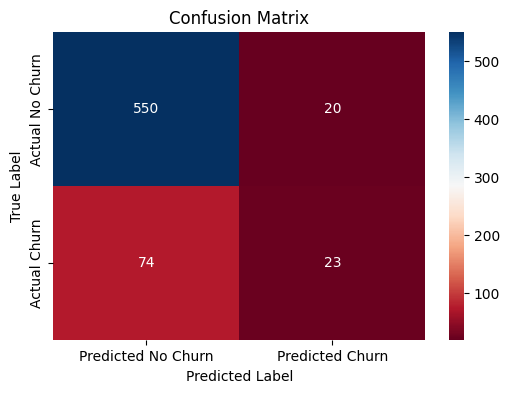

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu",
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_dt)}")

Decision Tree Model Evaluation:
              precision    recall  f1-score   support

       False       0.94      0.95      0.95       570
        True       0.69      0.63      0.66        97

    accuracy                           0.91       667
   macro avg       0.82      0.79      0.80       667
weighted avg       0.90      0.91      0.90       667

Accuracy: 0.9055472263868066
AUC-ROC: 0.7907487791644059


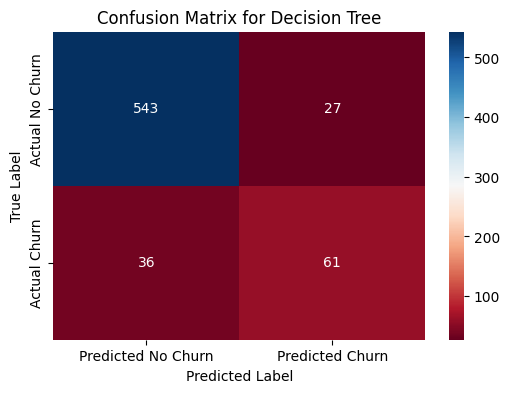

In [37]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu",
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

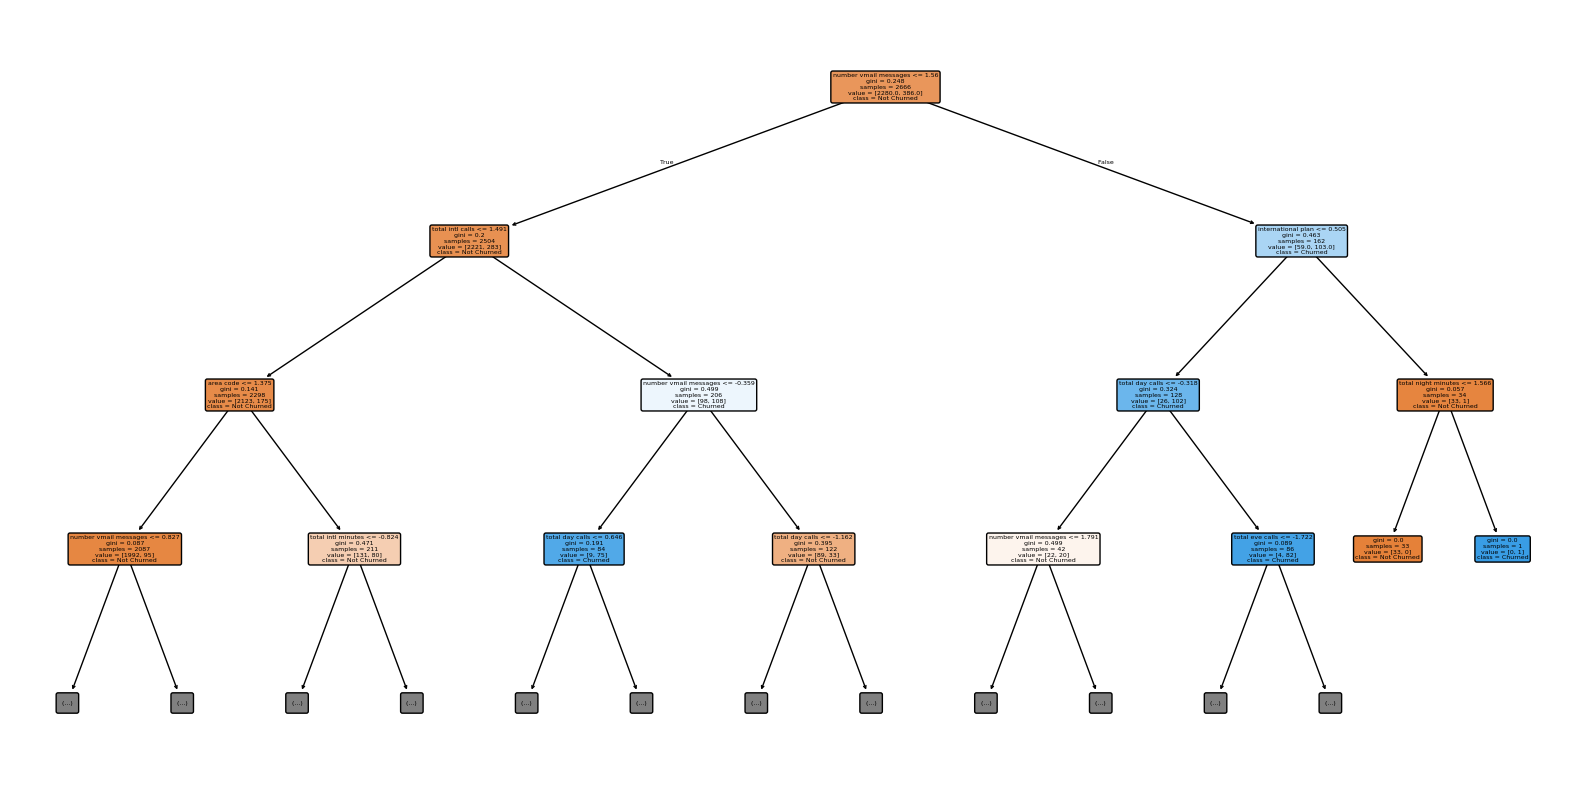

In [38]:
from sklearn.tree import plot_tree

#  dt_model is the trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))
plot_tree(dt_model, max_depth=3, feature_names=X.columns, class_names=['Not Churned', 'Churned'], filled=True, rounded=True)
plt.show()

# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_rf)}")


Random Forest Model Evaluation:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       570
        True       0.87      0.61      0.72        97

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.93      0.93      0.92       667

Accuracy: 0.9295352323838081
AUC-ROC: 0.7962289744981009


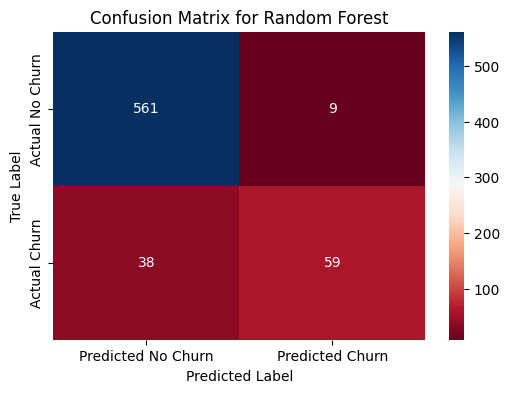

In [40]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu",
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# KNN classifier

KNN Model Evaluation:
              precision    recall  f1-score   support

       False       0.89      0.99      0.94       570
        True       0.78      0.29      0.42        97

    accuracy                           0.88       667
   macro avg       0.83      0.64      0.68       667
weighted avg       0.87      0.88      0.86       667

Accuracy: 0.8845577211394303
AUC-ROC: 0.6373123530475673


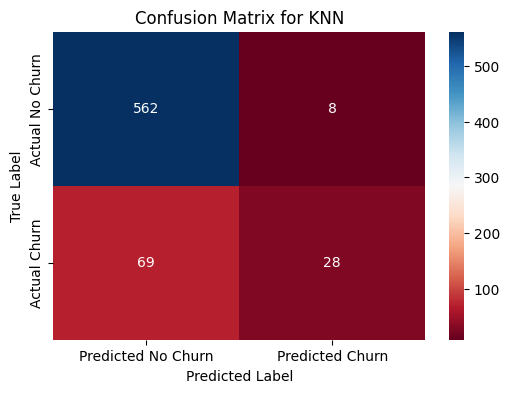

In [41]:
from sklearn.neighbors import KNeighborsClassifier


# Initialize the KNN classifier with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Model Evaluation:")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_knn)}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu",
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Hyperparameter Tuning


###  Tuned Random Forest

In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best AUC-ROC score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("Best Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_best_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_best_rf)}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best AUC-ROC score: 0.9195378451957399
Best Random Forest Model Evaluation:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       570
        True       0.87      0.61      0.72        97

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.93      0.93      0.92       667

Accuracy: 0.9295352323838081
AUC-ROC: 0.7962289744981009


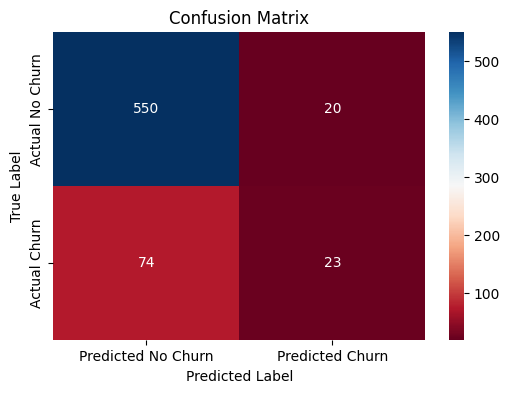

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu",
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Observations
Hyperparameter tuning optimized **max_depth, min_samples_split**, and increased n_estimators to **200,** achieving a best **AUC-ROC of 0.9195** during tuning. However, the final accuracy **(92.95%)**, **AUC-ROC (0.796)**, **precision (87%)**, and **recall (61%)** remained identical to the original model. This suggests that the default Random Forest parameters were already well-optimized for this dataset, and further tuning did not provide additional performance gains

### Tuned Decision Tree

In [44]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the training data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and the best score for Decision Tree
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best AUC-ROC score for Decision Tree:", grid_search_dt.best_score_)

# Evaluate the best Decision Tree model on the test set
best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

print("Best Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_best_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_dt)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_best_dt)}")

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best AUC-ROC score for Decision Tree: 0.886281700755385
Best Decision Tree Model Evaluation:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       570
        True       0.81      0.68      0.74        97

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667

Accuracy: 0.9310344827586207
AUC-ROC: 0.8270482908301682


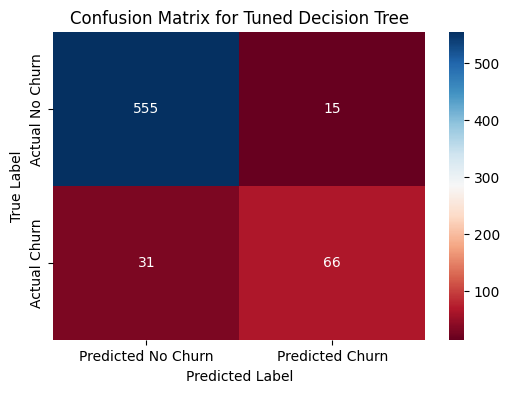

In [45]:
cm = confusion_matrix(y_test, y_pred_best_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu",
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Tuned Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Observations
After tuning, the Decision Tree model achieved higher **accuracy (93.1% vs. 90.6%)**, better recall for churn cases **(68% vs. 63%)**, and an improved **AUC-ROC (0.827 vs. 0.791)**. The best hyperparameters (max_depth=None, min_samples_leaf=2, min_samples_split=10) helped balance tree complexity and generalization, reducing *overfitting*. Unlike the Random Forest, tuning significantly improved performance, making the tuned Decision Tree a stronger candidate for customer churn prediction.

## Model evaluation


Logistic Regression Evaluation:
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667

Accuracy: 0.8590704647676162
AUC-ROC: 0.601012841381805


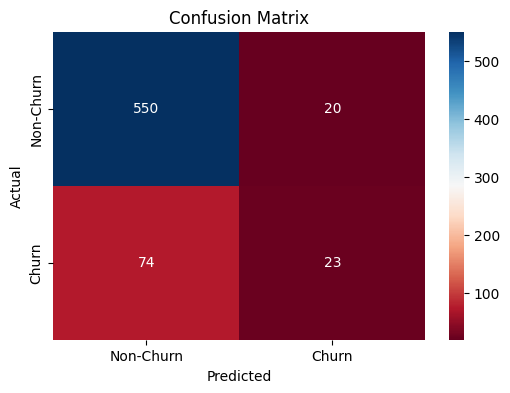


Decision Tree Evaluation:
              precision    recall  f1-score   support

       False       0.94      0.95      0.95       570
        True       0.69      0.63      0.66        97

    accuracy                           0.91       667
   macro avg       0.82      0.79      0.80       667
weighted avg       0.90      0.91      0.90       667

Accuracy: 0.9055472263868066
AUC-ROC: 0.7907487791644059


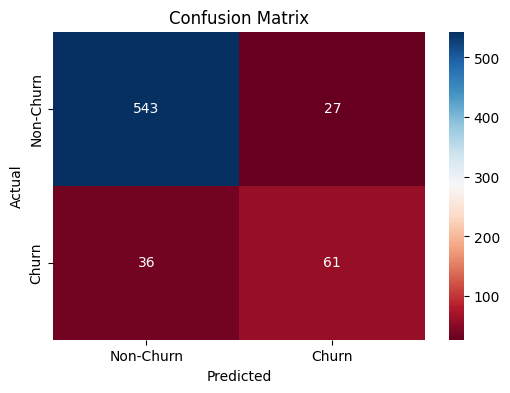


Random Forest Evaluation:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       570
        True       0.87      0.61      0.72        97

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.93      0.93      0.92       667

Accuracy: 0.9295352323838081
AUC-ROC: 0.7962289744981009


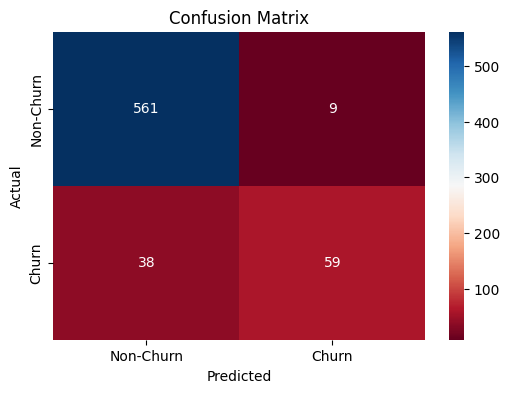


Tuned Random Forest Evaluation:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       570
        True       0.87      0.61      0.72        97

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.93      0.93      0.92       667

Accuracy: 0.9295352323838081
AUC-ROC: 0.7962289744981009


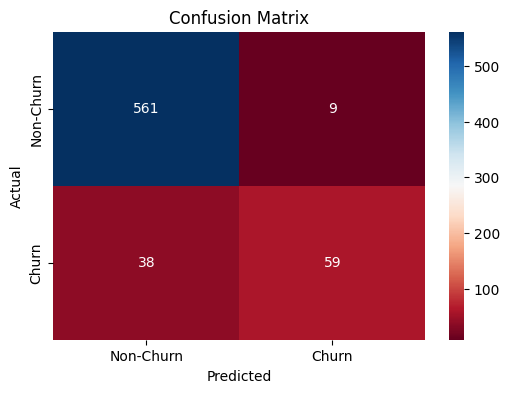


Tuned Decision Tree Evaluation:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       570
        True       0.81      0.68      0.74        97

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667

Accuracy: 0.9310344827586207
AUC-ROC: 0.8270482908301682


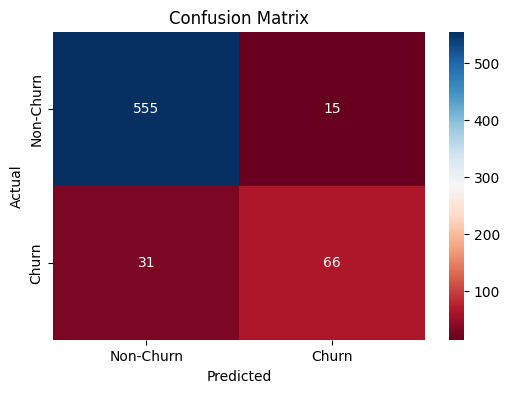

(0.9310344827586207, 0.8270482908301682)

In [46]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}")
    print(f"AUC-ROC: {roc_auc}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Adjust figure size
    sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu",
                xticklabels=["Non-Churn", "Churn"],
                yticklabels=["Non-Churn", "Churn"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    return accuracy, roc_auc


# Evaluate Logistic Regression
print("\nLogistic Regression Evaluation:")
evaluate_model(logreg_model, X_test, y_test)

# Evaluate Decision Tree
print("\nDecision Tree Evaluation:")
evaluate_model(dt_model, X_test, y_test)

# Evaluate Random Forest
print("\nRandom Forest Evaluation:")
evaluate_model(rf_model, X_test, y_test)

# Evaluate Tuned Random Forest
print("\nTuned Random Forest Evaluation:")
evaluate_model(best_rf_model, X_test, y_test)

# Evaluate Tuned Decision Tree
print("\nTuned Decision Tree Evaluation:")
evaluate_model(best_dt_model, X_test, y_test)



In [47]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the training data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and the best score for Decision Tree
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best AUC-ROC score for Decision Tree:", grid_search_dt.best_score_)

# Evaluate the best Decision Tree model on the test set
best_dt_model = grid_search_dt.best_estimator_ #This line assigns the tuned model to 'best_dt_model'
y_pred_best_dt = best_dt_model.predict(X_test)

print("Best Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_best_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_dt)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_best_dt)}")

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best AUC-ROC score for Decision Tree: 0.886281700755385
Best Decision Tree Model Evaluation:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       570
        True       0.81      0.68      0.74        97

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667

Accuracy: 0.9310344827586207
AUC-ROC: 0.8270482908301682


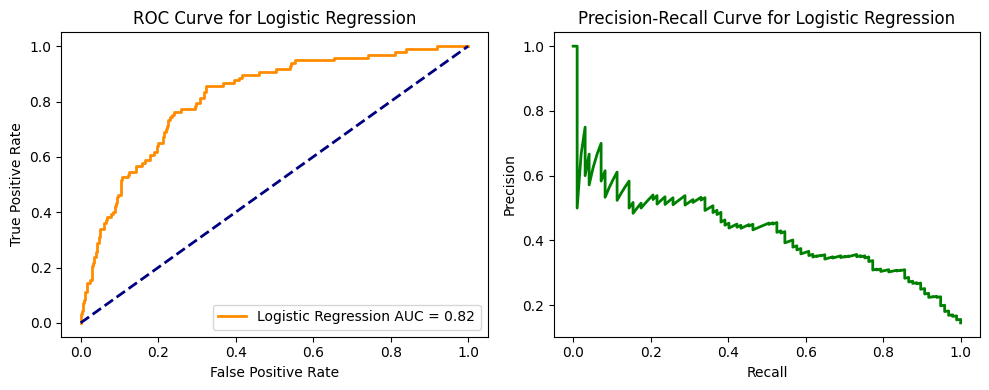

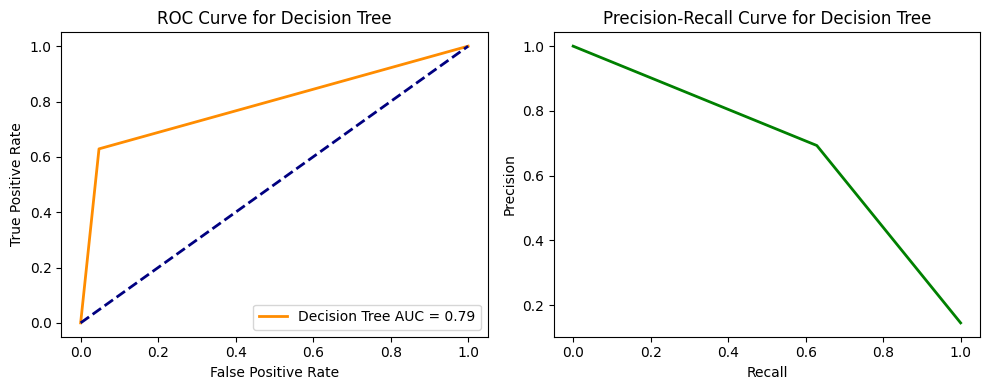

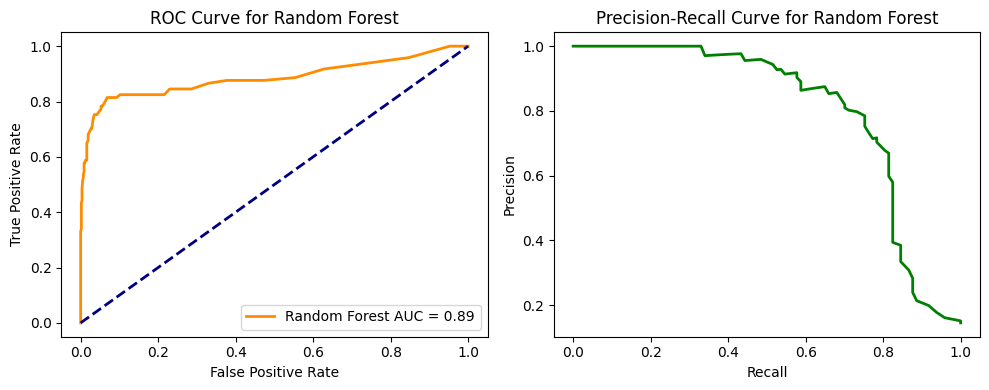

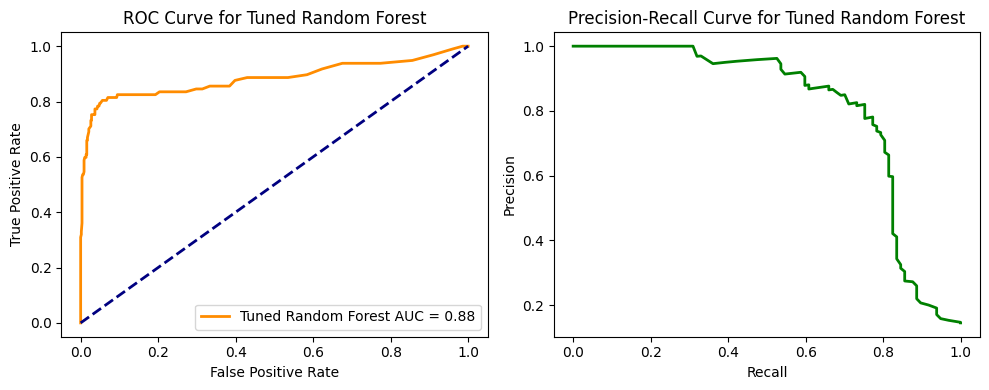

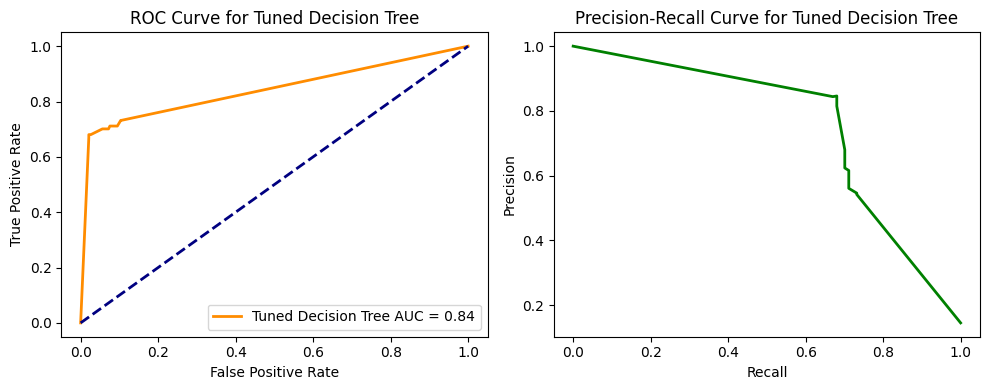

In [53]:

from sklearn.metrics import roc_curve, auc, precision_recall_curve


models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Tuned Random Forest': best_rf_model,
    'Tuned Decision Tree': best_dt_model
}


for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    # Plot ROC Curve and Precision-Recall Curve
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')

    plt.tight_layout()
    plt.show()


### 1. Revenue Impact of Churn:
 - This line chart displays monthly revenue and churn rate over time.
 - Observations: Even a small churn rate can impact revenue. Fluctuations in churn, even if small, matter.

### 2. Customer Acquisition vs. Retention Cost:
- This stacked bar chart compares acquisition and retention costs across customer segments.
- Observations: Acquisition costs generally exceed retention costs. Segment D has the highest total cost. Segment B shows high retention costs. Segment E has the lowest costs.  This suggests strategies should focus on improving retention and cost-effectiveness.

### 3. Correlation Matrix Heatmap:
- A heatmap displays the correlation between numerical customer features.
- Observations: Low correlations exist between most features, suggesting no strong linear relationships.  There is a slight negative correlation with customer service calls, implying that frequent calls might signal dissatisfaction, not high engagement. No single strong predictor is identified, so more complex methods might be required.

### 4. Model Performance:
- ROC curves and precision-recall curves visualize model performance. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds.  The AUC-ROC score measures the model's ability to distinguish between classes. The precision-recall curve displays the precision and recall at different thresholds. These curves help evaluate models' performance.





## Conclusion  & Recommendation


### Conclusion

The analysis of customer churn reveals that several key factors influence customer decisions to leave the service.  Notably, a high number of customer service calls is a strong predictor of churn, suggesting dissatisfaction among frequent callers. International plan subscriptions also exhibit a higher churn rate, possibly due to cost concerns or service quality issues.  Total day minutes show some correlation with churn, while other usage patterns did not exhibit strong predictive value.

 **Model evaluation**, including tuned Decision Tree and Random Forest models, indicates that the tuned Decision Tree model is the superior performer, exhibiting higher accuracy and AUC-ROC scores compared to the other models, including the tuned Random Forest. This suggests a greater reliability in predicting customer churn.  The model demonstrates the ability to distinguish between churning and non-churning customers, offering actionable insights for proactive interventions.



### Recommendations


1.   Improve customer service: Enhance customer service responsiveness and quality to address customer issues promptly and efficiently, aiming to reduce the number of calls required to resolve problems. Invest in training programs to equip support staff to handle customer queries more effectively.

2.   Review international plan pricing and services: Re-evaluate international plan costs and service offerings to ensure they are competitive and meet customer expectations. Investigate and address potential service quality issues impacting international subscribers. Consider offering more tailored or flexible international plan options.
3.   Proactive customer outreach: Implement a proactive customer outreach strategy to identify and engage high-risk customers (e.g., those with numerous service calls or international plans). Offer targeted incentives or support to retain these customers. This can include loyalty programs, discounts, or personalized services. Prioritize customers identified by the tuned Decision Tree model as high-risk.


4.   Leverage the Decision Tree model: Given its superior performance, integrate the tuned Decision Tree model into the customer relationship management system to proactively identify at-risk customers and tailor interventions. Continuously monitor the model's performance and retrain it periodically with updated data.


# Churn Prevention Strategy Roadmap

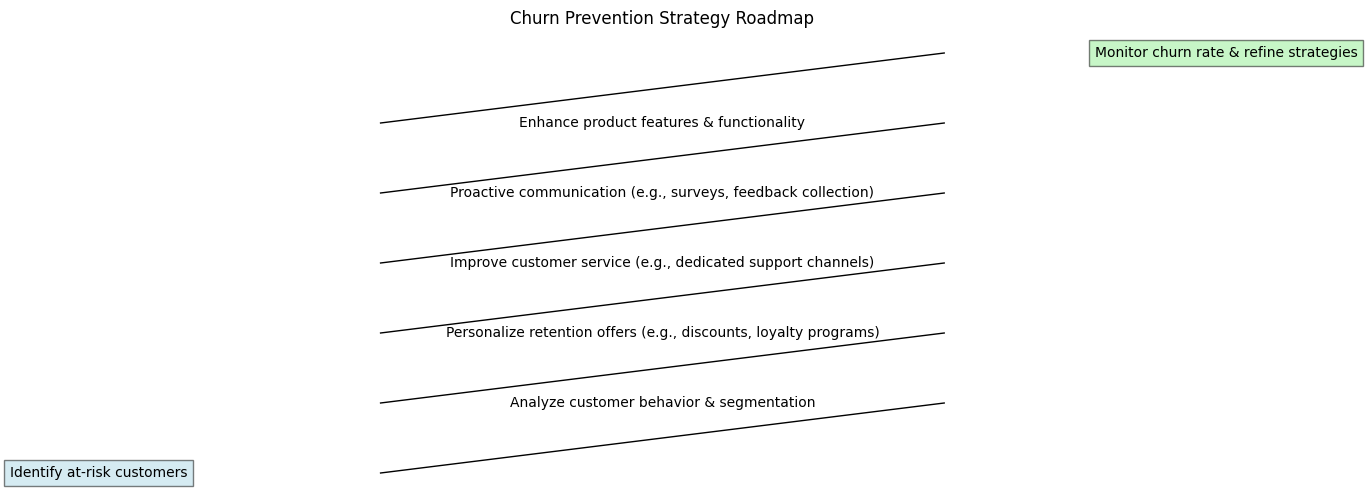

In [48]:
def create_churn_prevention_flowchart():
    # Define flowchart elements
    steps = [
        "Identify at-risk customers",
        "Analyze customer behavior & segmentation",
        "Personalize retention offers (e.g., discounts, loyalty programs)",
        "Improve customer service (e.g., dedicated support channels)",
        "Proactive communication (e.g., surveys, feedback collection)",
        "Enhance product features & functionality",
        "Monitor churn rate & refine strategies"
    ]

    # Create flowchart visualization
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis("off") # Hide axis

    # Draw flowchart elements
    y_positions = [i for i in range(len(steps))]
    for i, step in enumerate(steps):
        if i == 0:
            ax.text(0, y_positions[i], step, fontsize=10, ha='center', va='center',bbox=dict(facecolor='lightblue', alpha=0.5))
        elif i == len(steps) - 1:
            ax.text(2, y_positions[i], step, fontsize=10, ha='center', va='center',bbox=dict(facecolor='lightgreen', alpha=0.5))
        else:
            ax.text(1, y_positions[i], step, fontsize=10, ha='center', va='center')

        # Add connecting lines
        if i < len(steps) - 1:
            ax.plot([0.5, 1.5], [y_positions[i] , y_positions[i+1]], 'k-', lw=1)


    plt.title("Churn Prevention Strategy Roadmap")
    plt.show()

create_churn_prevention_flowchart()